In [2]:
"""
Step 1: Getting and setting up the data.
Step 2: Visualizing current data.
Step 3: The mathematics behind the Least Squares Method.
Step 4: Using Numpy for a Univariate Linear Regression.
Step 5: Getting the error.
Step 6: Using scikit learn to implement a multivariate regression.
Step 7: Using Training and Validation.  
Step 8: Predicting Prices
Step 9: Residual Plots
"""

'Step 1: Getting and setting up the data.\nStep 2: Visualizing current data.\nStep 3: The mathematics behind the Least Squares Method.\nStep 4: Using Numpy for a Univariate Linear Regression.\nStep 5: Getting the error.\nStep 6: Using scikit learn to implement a multivariate regression.\nStep 7: Using Training and Validation.  \nStep 8: Predicting Prices\nStep 9 : Residual Plots\n'

In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

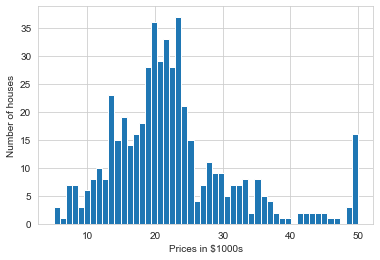

In [7]:
plt.hist(boston.target, bins = 50)
plt.xlabel("Prices in $1000s")
plt.ylabel("Number of houses")

Text(0.5, 0, 'Number of rooms')

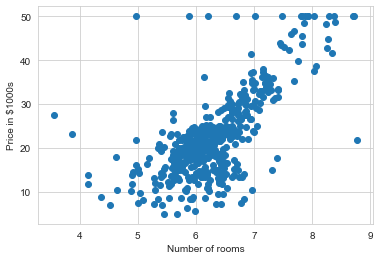

In [8]:
#every attribute in 5th column
#pozitive coorelation between number of rooms and price of house
plt.scatter(boston.data[:,5], boston.target)
plt.ylabel("Price in $1000s")
plt.xlabel("Number of rooms")

In [9]:
#making dataframe of data that we have in this dataset
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
#adding new column with price of house
boston_df["Price"] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


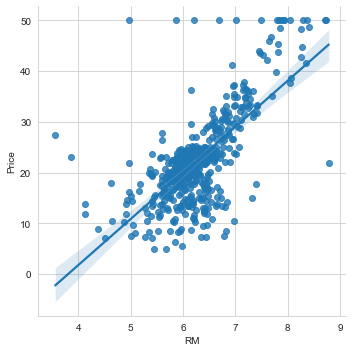

In [11]:
#plotting linear plot of Prices depending on Number of rooms
#linear fit for previous plot
#RM -  average number of rooms per dwelling
sns.lmplot("RM","Price",data=boston_df)

In [12]:
#Numpy has a built in Least Square Method in its linear algebra library. 
#We'll use this first for our Univariate regression and then move on to scikit learn for out Multi variate regression.
#We will start by setting up the X and Y arrays for numpy to take in.

In [14]:
X = boston_df.RM
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [52]:
#for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number
X = np.vstack(boston_df.RM)
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [53]:
Y = boston_df.Price
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [54]:
#506 values, 1 attribute
X.shape

(506, 1)

In [55]:
Y.shape

(506,)

In [56]:
#single valuable Linear Regresin with NumPy
# first making [X 1]
#form of for loop that makes 2D array (matrix) with value 1 in second column for every value in X array
X = np.array([[value, 1] for value in X], dtype='float')
X

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [57]:
# y = mx + b
# y = Ap, A=[x 1], p = [m
                    #   b]

m, b = np.linalg.lstsq(X,Y,rcond=None)[0]

In [58]:
m

9.102108981180315

In [59]:
b

-34.67062077643858

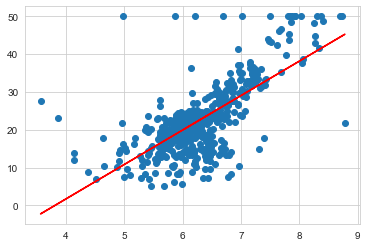

In [62]:
#original points
plt.plot(boston_df.RM, boston_df.Price, 'o')

#best fit line using NumPy

x = boston_df.RM

plt.plot(x, m*x + b, 'r', label="Best fit line")
#we manualy created previes seaborn plot

In [69]:
#getting root mean squerd error (rmse) of the line we just fitted

result = np.linalg.lstsq(X,Y,rcond=None)

error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print("The root mean square error was {}".format(rmse))

The root mean square error was [6.60307139]


In [70]:
#using scikit learn to implement Multivariante Linear Regressin

In [72]:
print("The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.")

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.


In [85]:
import sklearn
from sklearn.linear_model import LinearRegression
#in Py2 sklearn.cross_validation in Py3 sklearn.model_selection
from sklearn.model_selection import train_test_split

In [86]:
lreg = LinearRegression()

In [87]:
X_multi = boston_df.drop("Price",1)
Y_target = boston_df.Price

In [88]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
print("the estimated intercept coefficient is {}".format(lreg.intercept_))
print("The number of coefficients used was {}".format( len(lreg.coef_) ))

the estimated intercept coefficient is 36.45948838509009
The number of coefficients used was 13


In [90]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ["Features"]
coeff_df["Coefficient Estimate"] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [91]:
#using trainnig(to build model) and validation(to valide model)

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X,boston_df.Price)

In [94]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [95]:
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [112]:
print("Fit model X_train and calculate the MSE with Y_train {:.2f}".format(np.mean(Y_train - pred_train)**2))

Fit model X_train and calculate the MSE with Y_train 0.00


In [110]:
print("Fit a model X_train, and calculate MSE with X_test and Y_test {:.2f}".format(np.mean(Y_test - pred_test)**2))

Fit a model X_train, and calculate MSE with X_test and Y_test 0.25


In [113]:
#Residual Plots
#Residual = Observed value - Predicted value

Text(0.5, 1.0, 'Residual plots')

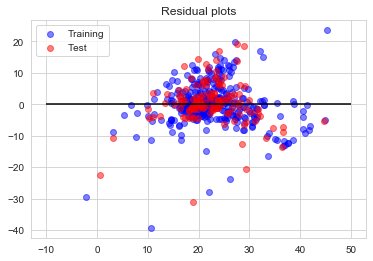

In [118]:
train = plt.scatter(pred_train, (pred_train - Y_train), c='b', alpha = 0.5)
test = plt.scatter(pred_test, (pred_test - Y_test), c='r', alpha = 0.5)
plt.hlines(y=0, xmin=-10, xmax=50)
plt.legend((train, test), ("Training", "Test"), loc='upper left')
plt.title("Residual plots")